## Extract FLASH Data in yt
Mirielle Wong

6/21/24

Use yt's covering_grid class to extract data from FLASH.

In [7]:
# https://yt-project.org/

import yt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime\

SyntaxError: incomplete input (3237776360.py, line 8)

In [33]:
# plot_path = "./OSIRIS_transfer/MAGOFF/MagShockZ_hdf5_plt_cnt_0004"
plot_path = "./OSIRIS_transfer/MAGON/MagShockZ_hdf5_chk_0005"

In [34]:
ds = yt.load(plot_path)

yt : [INFO     ] 2024-07-10 10:18:31,422 Particle file found: MagShockZ_hdf5_chk_0005


yt : [INFO     ] 2024-07-10 10:18:31,459 Parameters: current_time              = 1.8520020414484505e-09
yt : [INFO     ] 2024-07-10 10:18:31,460 Parameters: domain_dimensions         = [288 272 288]
yt : [INFO     ] 2024-07-10 10:18:31,460 Parameters: domain_left_edge          = [-0.6   -0.075 -0.6  ]
yt : [INFO     ] 2024-07-10 10:18:31,460 Parameters: domain_right_edge         = [0.6 1.  0.6]
yt : [INFO     ] 2024-07-10 10:18:31,461 Parameters: cosmological_simulation   = 0


In [35]:
list(ds.fields.flash)

[On-Disk Field ('flash', 'absr'): (units: '', display_name: 'Absorption Coefficient'),
 On-Disk Field ('flash', 'cham'): (units: '', display_name: 'Chamber Material Fraction'),
 On-Disk Field ('flash', 'cond'): (units: '', display_name: 'Conductivity'),
 On-Disk Field ('flash', 'dbgs'): (units: '', display_name: 'Debug for Shocks'),
 On-Disk Field ('flash', 'dens'): (units: 'code_mass/code_length**3'),
 On-Disk Field ('flash', 'depo'): (units: 'code_length**2/code_time**2'),
 On-Disk Field ('flash', 'dfcf'): (units: '', display_name: 'Diffusion Equation Scalar'),
 On-Disk Field ('flash', 'divb'): (units: 'code_magnetic/code_length'),
 On-Disk Field ('flash', 'eele'): (units: 'code_mass * (code_length/code_time)**2', display_name: 'Electron Internal Specific Energy'),
 On-Disk Field ('flash', 'eint'): (units: 'code_length**2/code_time**2'),
 On-Disk Field ('flash', 'eion'): (units: 'code_mass * (code_length/code_time)**2', display_name: 'Ion Internal Specific Energy'),
 On-Disk Field ('

In [36]:
print(ds.domain_dimensions)
domain_left_edge = [-0.6, -0.075, -0.6]    # from info printed in yt.load

[288 272 288]


In [37]:
# this is from the yt documentation

level = 2
dims = ds.domain_dimensions * ds.refine_by**level

# We construct an object that describes the data region and structure we want
# In this case, we want all data up to the maximum "level" of refinement
# across the entire simulation volume.  Higher levels than this will not
# contribute to our covering grid.
all_data = ds.covering_grid(
    level,
    left_edge=domain_left_edge,
    dims=dims,
    # And any fields to preload (this is optional!)
)

In [38]:
# relevant vars

print(ds.units)
print(ds.length_unit)
print(ds.mass_unit)
print(dims)
print(ds.domain_dimensions)
print(ds.refine_by)

1.0 cm
1.0 g
[1152 1088 1152]
[288 272 288]
2


In [39]:
data_level0 = ds.covering_grid(
    1,
    left_edge=domain_left_edge,
    dims=ds.domain_dimensions
)

In [40]:
# check shape

print(data_level0['flash', 'vely'][:, :, 0].shape)
print(data_level0['index', 'cell_volume'].shape)

(288, 272)
(288, 272, 288)


In [41]:
# we can create a df for any any field in ds.fields.flash
ye = pd.DataFrame(data_level0['flash', 'ye'][:, :, 0]) # why is this taking the zeroth index?
tion = pd.DataFrame(data_level0['flash', 'tion'][:, :, 0])

In [42]:
density = pd.DataFrame(data_level0['flash', 'dens'][:, :, -1])
trad = pd.DataFrame(data_level0['flash', 'trad'][:, :, -1])

cell_volume = pd.DataFrame(data_level0['index', 'cell_volume'][:,:,-1])
density.head

<bound method NDFrame.head of        0      1      2      3      4      5      6      7      8      9    \
0    1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
1    1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
2    1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
3    1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
4    1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
283  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
284  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
285  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
286  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
287  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   

     ...       262       263       264       

yt : [INFO     ] 2024-07-10 10:21:40,365 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-10 10:21:40,366 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-10 10:21:40,369 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-10 10:21:40,370 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-10 10:21:40,370 Making a fixed resolution buffer of (('flash', 'eion')) 800 by 800



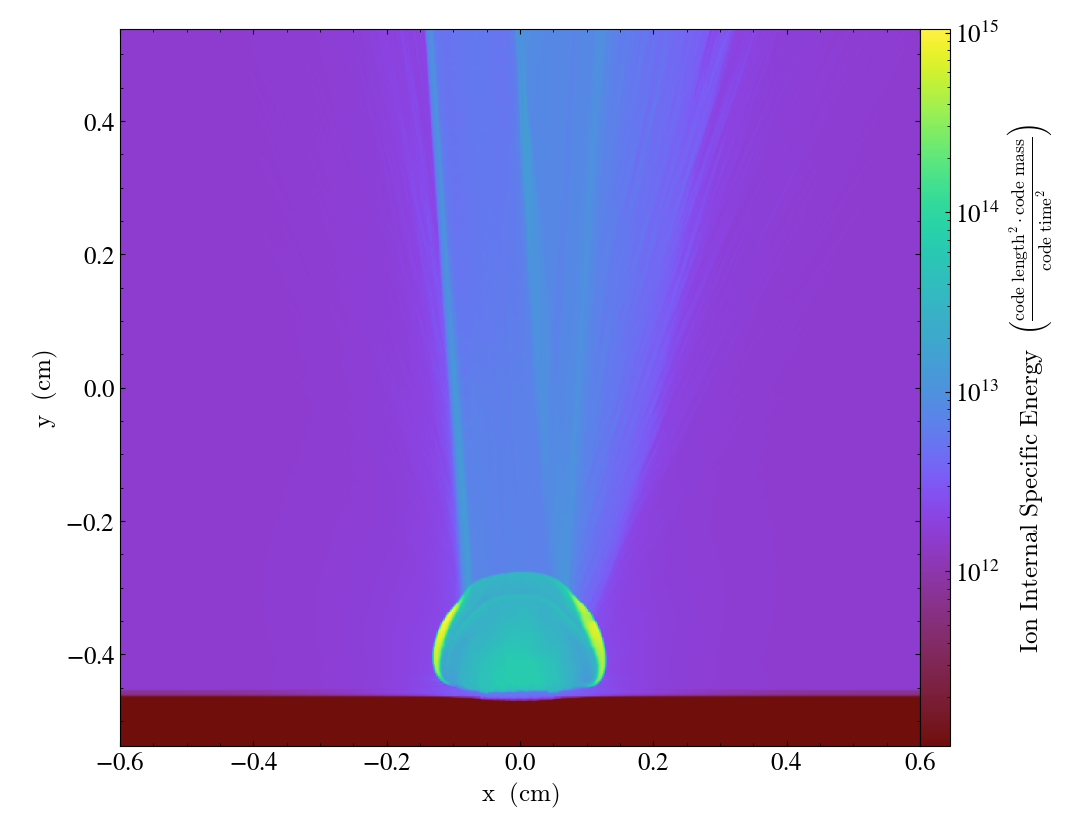

In [50]:
yt.SlicePlot(ds,"z",("eion"))

In [13]:
density.to_csv("dens_grid.csv", index=False)

In [14]:
density.to_hdf("dens_grid.h5", key='density')